<a href="https://colab.research.google.com/github/21-LAKSHMI/AI-AND-ML/blob/main/Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/chennai_rainfall_2019_2023_mm.csv')
display(df.head())

,Date,Year,Month,Temperature (°C),Humidity (%),Wind Speed (km/h),Rainfall (cm),Rainfall (mm)
0,2019-01-01,2019,1,31.0,74.5,13.3,0.5,5.0
1,2019-01-02,2019,1,29.7,87.1,9.5,0.1,1.0
2,2019-01-03,2019,1,31.3,79.5,12.4,0.3,3.0
3,2019-01-04,2019,1,33.0,80.1,13.1,0.1,1.0
4,2019-01-05,2019,1,29.5,83.5,12.0,1.4,14.0


In [3]:
X = df.drop(['Rainfall (cm)', 'Rainfall (mm)', 'Date'], axis=1)
y = df['Rainfall (cm)']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

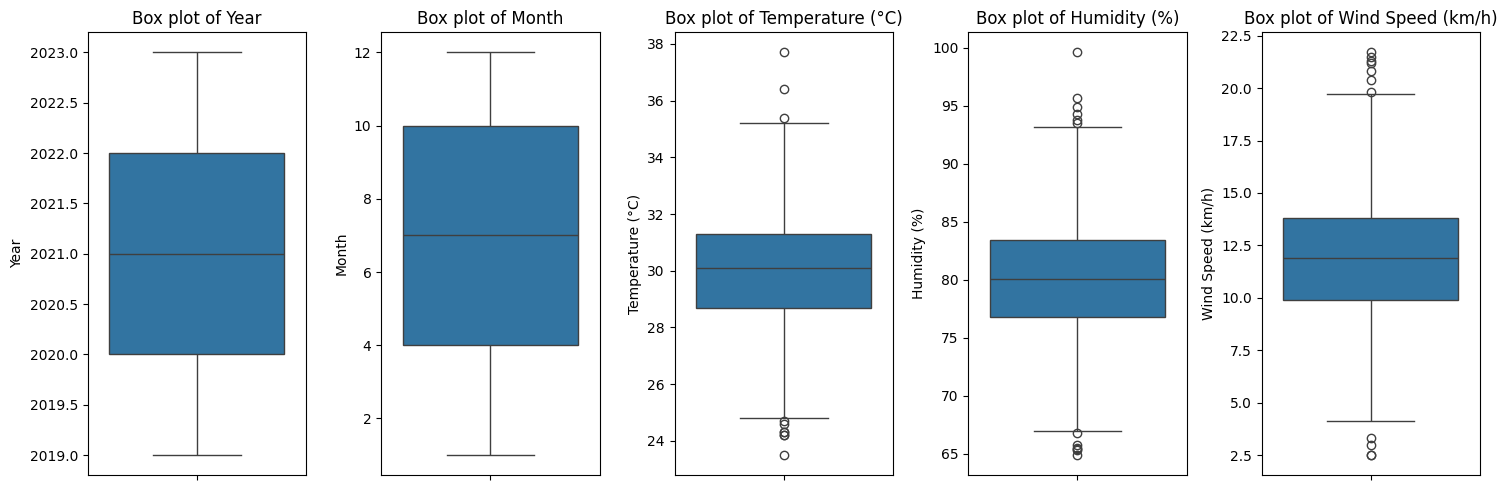

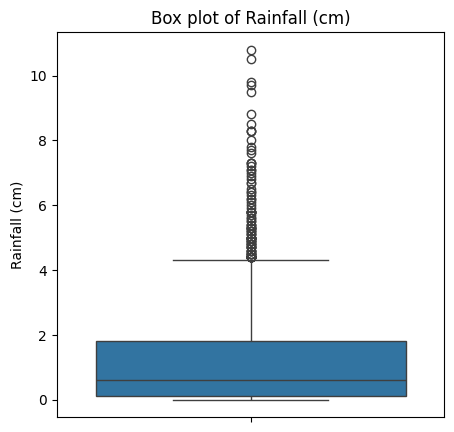

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for features
plt.figure(figsize=(15, 5))
for i, col in enumerate(X_train.columns):
    plt.subplot(1, len(X_train.columns), i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Box plot for target variable
plt.figure(figsize=(5, 5))
sns.boxplot(y=y_train)
plt.title('Box plot of Rainfall (cm)')
plt.show()

In [6]:
# Identify outliers using IQR and apply capping to training data
for col in X_train.columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

Q1_y = y_train.quantile(0.25)
Q3_y = y_train.quantile(0.75)
IQR_y = Q3_y - Q1_y
lower_bound_y = Q1_y - 1.5 * IQR_y
upper_bound_y = Q3_y + 1.5 * IQR_y
y_train = y_train.clip(lower=lower_bound_y, upper=upper_bound_y)

# Apply the same capping to the test data using the bounds from training data
for col in X_test.columns:
    Q1 = X_train[col].quantile(0.25) # Use bounds from training data
    Q3 = X_train[col].quantile(0.75) # Use bounds from training data
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_test[col] = X_test[col].clip(lower=lower_bound, upper=upper_bound)

Q1_y_train = y_train.quantile(0.25) # Use bounds from training data
Q3_y_train = y_train.quantile(0.75) # Use bounds from training data
IQR_y_train = Q3_y_train - Q1_y_train
lower_bound_y_test = Q1_y_train - 1.5 * IQR_y_train
upper_bound_y_test = Q3_y_train + 1.5 * IQR_y_train
y_test = y_test.clip(lower=lower_bound_y_test, upper=upper_bound_y_test)

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,Year,Month,Temperature (°C),Humidity (%),Wind Speed (km/h)
439,2020,3,29.9,86.0,16.3
544,2020,6,25.1,79.2,15.3
182,2019,7,27.9,83.3,9.1
170,2019,6,28.2,79.9,11.9
292,2019,10,28.8,67.2,10.8


,Rainfall (cm)
439,0.40
544,3.20
182,4.35
170,4.35
292,1.30


,Year,Month,Temperature (°C),Humidity (%),Wind Speed (km/h)
998,2021,9,28.9,79.7,11.3
1518,2023,2,28.0,75.2,12.9
298,2019,10,31.6,80.1,13.5
415,2020,2,28.5,82.9,12.9
1120,2022,1,32.2,80.4,13.9


,Rainfall (cm)
998,0.6
1518,0.1
298,3.6
415,0.6
1120,0.4


In [7]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR # Import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR() # Add SVR to the models dictionary
}

In [19]:
results = {}
n_train = X_train.shape[0]
n_test = X_test.shape[0]
k = X_train.shape[1] # number of features

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    adj_r2_train = 1 - (1-r2_train)*(n_train-1)/(n_train-k-1)

    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    adj_r2_test = 1 - (1-r2_test)*(n_test-1)/(n_test-k-1)


    results[name] = {
        "Training R2": r2_train,
        "Training Adjusted R2": adj_r2_train,
        "Training MSE": mse_train,
        "Training MAE": mae_train,
        "Testing R2": r2_test,
        "Testing Adjusted R2": adj_r2_test,
        "Testing MSE": mse_test,
        "Testing MAE": mae_test
    }


In [20]:
for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"Training R2: {metrics['Training R2']:.4f}")
    print(f"Training Adjusted R2: {metrics['Training Adjusted R2']:.4f}")
    print(f"Training MSE: {metrics['Training MSE']:.4f}")
    print(f"Training MAE: {metrics['Training MAE']:.4f}")
    print(f"Testing R2: {metrics['Testing R2']:.4f}")
    print(f"Testing Adjusted R2: {metrics['Testing Adjusted R2']:.4f}")
    print(f"Testing MSE: {metrics['Testing MSE']:.4f}")
    print(f"Testing MAE: {metrics['Testing MAE']:.4f}")
    print("-" * (len(name) + 6))


--- Linear Regression ---
Training R2: 0.1600
Training Adjusted R2: 0.1571
Training MSE: 1.5535
Training MAE: 0.9488
Testing R2: 0.1610
Testing Adjusted R2: 0.1493
Testing MSE: 1.5383
Testing MAE: 0.9525
-----------------------
--- Decision Tree Regressor ---
Training R2: 1.0000
Training Adjusted R2: 1.0000
Training MSE: 0.0000
Training MAE: 0.0000
Testing R2: 0.0241
Testing Adjusted R2: 0.0106
Testing MSE: 1.7892
Testing MAE: 0.8854
-----------------------------
--- Random Forest Regressor ---
Training R2: 0.9175
Training Adjusted R2: 0.9172
Training MSE: 0.1526
Training MAE: 0.2720
Testing R2: 0.4318
Testing Adjusted R2: 0.4239
Testing MSE: 1.0418
Testing MAE: 0.7336
-----------------------------
--- Support Vector Regressor ---
Training R2: 0.3493
Training Adjusted R2: 0.3471
Training MSE: 1.2034
Training MAE: 0.7167
Testing R2: 0.3315
Testing Adjusted R2: 0.3222
Testing MSE: 1.2257
Testing MAE: 0.7647
------------------------------


In [21]:
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [23]:
import pickle
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Load the saved scaler and model
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions using the loaded model
y_train_pred_loaded = loaded_model.predict(X_train)
y_test_pred_loaded = loaded_model.predict(X_test)

# Calculate metrics for training set
r2_train_loaded = r2_score(y_train, y_train_pred_loaded)
mse_train_loaded = mean_squared_error(y_train, y_train_pred_loaded)
mae_train_loaded = mean_absolute_error(y_train, y_train_pred_loaded)
adj_r2_train_loaded = 1 - (1-r2_train_loaded)*(n_train-1)/(n_train-k-1)

# Calculate metrics for test set
r2_test_loaded = r2_score(y_test, y_test_pred_loaded)
mse_test_loaded = mean_squared_error(y_test, y_test_pred_loaded)
mae_test_loaded = mean_absolute_error(y_test, y_test_pred_loaded)
adj_r2_test_loaded = 1 - (1-r2_test_loaded)*(n_test-1)/(n_test-k-1)

# Store the metrics in a dictionary
loaded_model_metrics = {
    "Training R2": r2_train_loaded,
    "Training Adjusted R2": adj_r2_train_loaded,
    "Training MSE": mse_train_loaded,
    "Training MAE": mae_train_loaded,
    "Testing R2": r2_test_loaded,
    "Testing Adjusted R2": adj_r2_test_loaded,
    "Testing MSE": mse_test_loaded,
    "Testing MAE": mae_test_loaded
}

display(loaded_model_metrics)

{'Training R2': 0.9175093553173257,
 'Training Adjusted R2': 0.9172256873507415,
 'Training MSE': 0.15256022174657502,
 'Training MAE': 0.2719503424657531,
 'Testing R2': 0.4317693184587792,
 'Testing Adjusted R2': 0.4238772256595955,
 'Testing MSE': 1.0417888804644806,
 'Testing MAE': 0.7336407103825137}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [15]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Best hyperparameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [16]:
# Train the Random Forest Regressor with the best hyperparameters
best_params = grid_search.best_params_
tuned_model = RandomForestRegressor(random_state=42, **best_params)
tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [17]:
# Evaluate the tuned model
y_train_pred_tuned = tuned_model.predict(X_train)
y_test_pred_tuned = tuned_model.predict(X_test)

# Calculate metrics for training set
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)
mse_train_tuned = mean_squared_error(y_train, y_train_pred_tuned)
mae_train_tuned = mean_absolute_error(y_train, y_train_pred_tuned)
adj_r2_train_tuned = 1 - (1-r2_train_tuned)*(n_train-1)/(n_train-k-1)

# Calculate metrics for test set
r2_test_tuned = r2_score(y_test, y_test_pred_tuned)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
mae_test_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
adj_r2_test_tuned = 1 - (1-r2_test_tuned)*(n_test-1)/(n_test-k-1)


tuned_model_metrics = {
    "Training R2": r2_train_tuned,
    "Training Adjusted R2": adj_r2_train_tuned,
    "Training MSE": mse_train_tuned,
    "Training MAE": mae_train_tuned,
    "Testing R2": r2_test_tuned,
    "Testing Adjusted R2": adj_r2_test_tuned,
    "Testing MSE": mse_test_tuned,
    "Testing MAE": mae_test_tuned
}

display(tuned_model_metrics)

{'Training R2': 0.6142704951258997,
 'Training Adjusted R2': 0.6129440525369241,
 'Training MSE': 0.713377608141655,
 'Training MAE': 0.5834757627835395,
 'Testing R2': 0.44151218758926647,
 'Testing Adjusted R2': 0.4337554124168952,
 'Testing MSE': 1.0239263942354158,
 'Testing MAE': 0.7316125662899418}